In [4]:
import pandas as pd
import json
import re


In [16]:
data = pd.read_csv('pubmed_pdfs.csv')
data = data[data.titles != 'Not Found']
data=data[data.pdfs != 'No pdf']
len(data)

300

In [17]:
ground_truth = list(data.final_selection)

## Creating Inferencing Functions

In [18]:
def study_inference(study_output): 

    study_selection = []
    study_explanation = []

    for paper in study_output:
        if paper == 'Error loading the pdf':
            continue
        check_list = []
        reasons = []
        for ele in paper:  
            try: 
                # Use regular expressions to search for whole words 'yes'
                ele = json.loads(ele)
            except: 
                study_explanation.append("Bad Output")
                study_selection.append(1)
                continue
            match_yes = re.search(r'\byes\b', ele['answer'].lower())
            check_list.append(match_yes is not None)
            reasons.append(ele['reason'])
        if sum(check_list) == 0:
            study_explanation.append("")
            study_selection.append(1)
        else:
            study_explanation.append(reasons[check_list.index(True)])
            study_selection.append(0)
            
    return study_selection,study_explanation


def population_inference(population_output):
    pop_selection = []
    pop_explanation = []

    for paper in population_output:
        if paper == 'Error loading the pdf':
            continue
        check_list = []
        reasons = []
        for i,ele in enumerate(paper):  
            # Use regular expressions to search for whole words 'no'
            try: 
                ele = json.loads(ele)
                match_no = re.search(r'\bno\b', ele['answer'].lower())
                reasons.append(ele['reason'])
            except: 
                match_no = re.search(r'\bno\b', ele.lower().replace('"',''))
                reasons.append(ele)
            check_list.append(match_no is not None)
            
        if sum(check_list) == 0:
            pop_explanation.append("")
            pop_selection.append(1)
        else:
            pop_explanation.append(reasons[check_list.index(True)])
            pop_selection.append(0)
    return pop_selection,pop_explanation

def outcome_inference(outcome_output): 

    outcome_selection = []
    outcome_explanation = []

    for paper in outcome_output:
        if paper == 'Error Loading the pdf':
            continue
        check_list = []
        reasons = []
        for i,ele in enumerate(paper): 
            # Use regular expressions to search for whole words 'no'
            ele = json.loads(ele)
            match_no = re.search(r'\bno\b', ele['answer'].lower())
            check_list.append(match_no is not None)
            reasons.append(ele['reason'])
        if sum(check_list) == 0:
            outcome_explanation.append("")
            outcome_selection.append(1)
        else:
            outcome_explanation.append(reasons[check_list.index(True)])
            outcome_selection.append(0)
    
    return outcome_selection,outcome_explanation


## LLama 3

In [19]:
output = pd.read_csv("first_screening_outputs/llama3.csv")
study_output = list(output.StudyDesign)
population_output = list(output.Population)
outcome_output = list(output.Outcome)

study_output = [eval(ele) for ele in study_output if ele != 'Error loading the pdf']
population_output = [eval(ele) for ele in population_output if ele != 'Error loading the pdf']
outcome_output = [eval(ele) for ele in outcome_output if ele != 'Error loading the pdf']

In [20]:
study_selection,study_explanation = study_inference(study_output)
pop_selection,pop_explanation = population_inference(population_output)
outcome_selection,outcome_explanation = outcome_inference(outcome_output)

In [21]:
# Create the resultant list using list comprehension and zip
resultant_list = [1 if a == b == c == 1 else 0 for a, b, c in zip(study_selection, pop_selection, outcome_selection)]

In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Generate the confusion matrix
cm = confusion_matrix(ground_truth, resultant_list)
report = classification_report(ground_truth,resultant_list)
print(report)

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       270
         1.0       0.20      0.17      0.18        30

    accuracy                           0.85       300
   macro avg       0.55      0.55      0.55       300
weighted avg       0.84      0.85      0.84       300



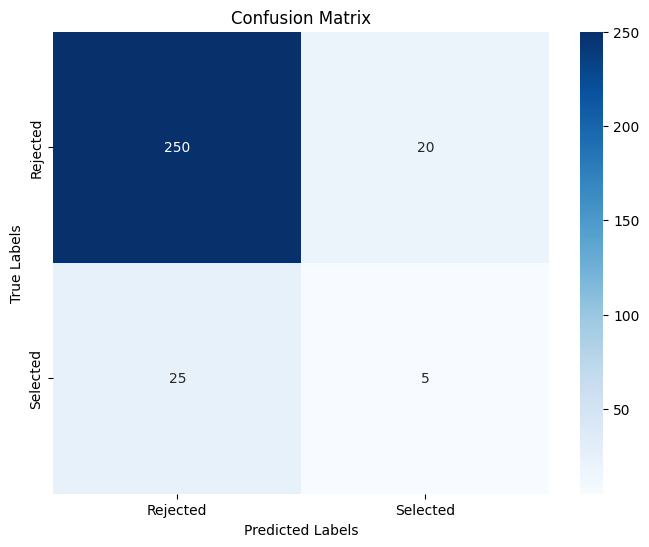

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Rejected', 'Selected'],
            yticklabels=['Rejected', 'Selected'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Gemma2

In [10]:
output = pd.read_csv("first_screening_outputs/gemma.csv")
study_output = list(output.StudyDesign)
population_output = list(output.Population)
outcome_output = list(output.Outcome)

study_output = [eval(ele) for ele in study_output if ele != 'Error loading the pdf']
population_output = [eval(ele) for ele in population_output if ele != 'Error loading the pdf']
outcome_output = [eval(ele) for ele in outcome_output if ele != 'Error loading the pdf']

In [11]:
study_selection,study_explanation = study_inference(study_output)
pop_selection,pop_explanation = population_inference(population_output)
outcome_selection,outcome_explanation = outcome_inference(outcome_output)

In [12]:
# Create the resultant list using list comprehension and zip
resultant_list = [1 if a == b == c == 1 else 0 for a, b, c in zip(study_selection, pop_selection, outcome_selection)]

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Generate the confusion matrix
cm = confusion_matrix(ground_truth, resultant_list)
report = classification_report(ground_truth,resultant_list)
print(report)

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       270
         1.0       0.23      0.23      0.23        30

    accuracy                           0.85       300
   macro avg       0.57      0.57      0.57       300
weighted avg       0.85      0.85      0.85       300



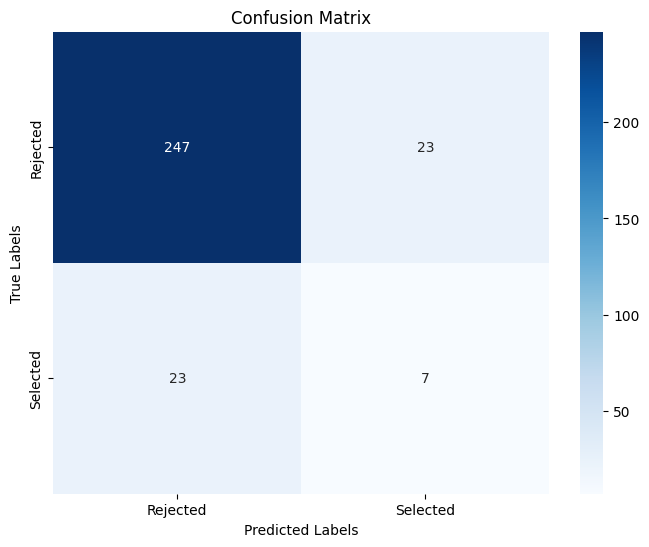

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Rejected', 'Selected'],
            yticklabels=['Rejected', 'Selected'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## LLama 3.1

In [8]:
output = pd.read_csv("first_screening_outputs/llama3.1.csv")
study_output = list(output.StudyDesign)
population_output = list(output.Population)
outcome_output = list(output.Outcome)

study_output = [eval(ele) for ele in study_output if ele != 'Error loading the pdf']
population_output = [eval(ele) for ele in population_output if ele != 'Error loading the pdf']
outcome_output = [eval(ele) for ele in outcome_output if ele != 'Error loading the pdf']

In [9]:
study_selection,study_explanation = study_inference(study_output)
pop_selection,pop_explanation = population_inference(population_output)
outcome_selection,outcome_explanation = outcome_inference(outcome_output)

In [10]:
# Create the resultant list using list comprehension and zip
resultant_list = [1 if a == b == c == 1 else 0 for a, b, c in zip(study_selection, pop_selection, outcome_selection)]

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Generate the confusion matrix
cm = confusion_matrix(ground_truth, resultant_list)
report = classification_report(ground_truth,resultant_list)
print(report)

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       270
         1.0       0.00      0.00      0.00        30

    accuracy                           0.90       300
   macro avg       0.45      0.50      0.47       300
weighted avg       0.81      0.90      0.85       300



/opt/anaconda3/envs/rag-chatbot/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/rag-chatbot/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/rag-chatbot/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

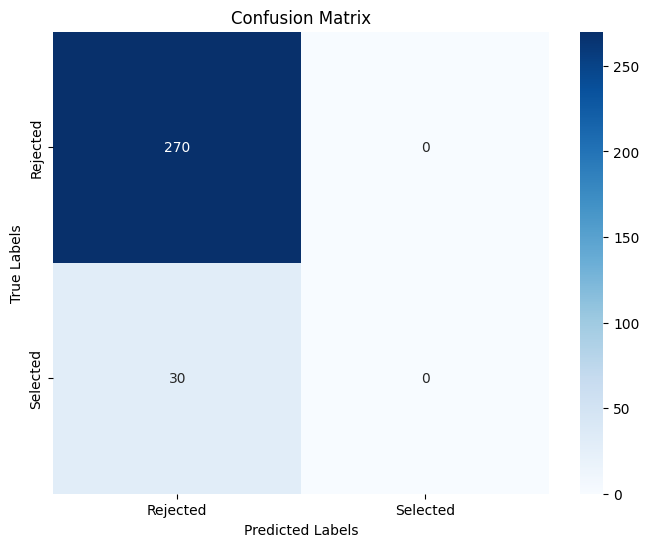

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Rejected', 'Selected'],
            yticklabels=['Rejected', 'Selected'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()